#OASIS INTERNSHIP-DATA SCIENCE-INTERN
# IRIS FLOWER CLASSIFICATION


#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

#LOADING DATASET

In [ ]:
data=pd.read_csv("/content/Iris.csv")

#INSIGHTS

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.duplicated().sum()

0

In [31]:
a = pd.DataFrame({
    'Column1': [1, 2, 3, None, 5],
    'Column2': [6, 7, None, 9, 10],
    'Column3': [11, 12, 13, 14, 15]
})
data = a.isna().sum().sort_values(ascending=False)
column_to_drop = 'Column1'
a.drop(columns=column_to_drop, inplace=True)
remaining_columns = a.columns
print(remaining_columns)

Index(['Column2', 'Column3'], dtype='object')


In [33]:
a.isna().sum()

Column2    1
Column3    0
dtype: int64

#ANALYSING DATA WITH GRAPHS

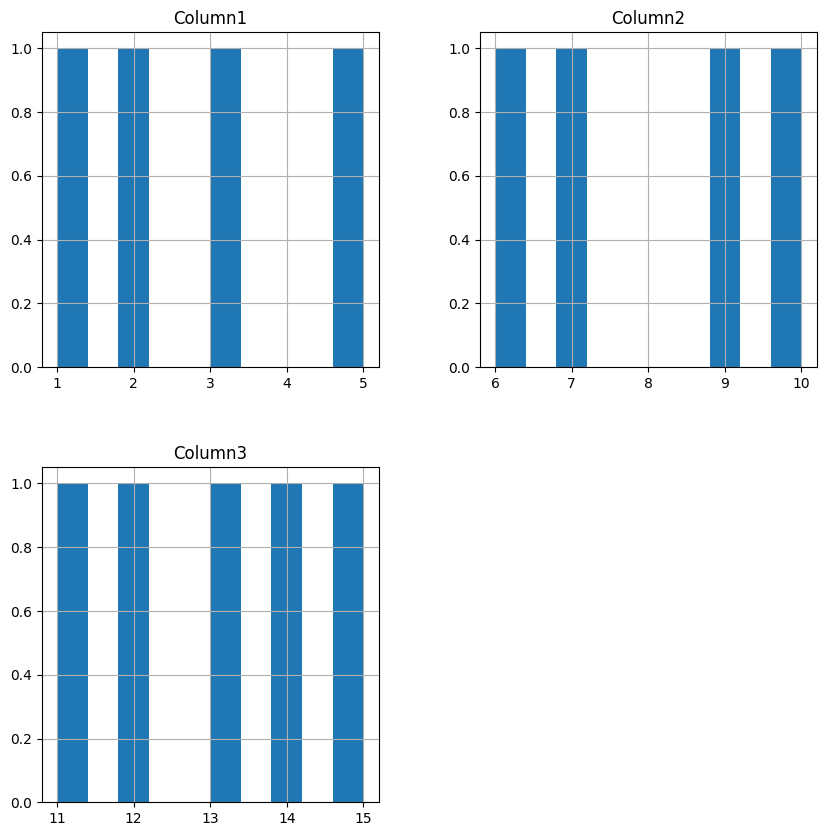

In [29]:
a.hist(figsize=(10,10))
plt.show()

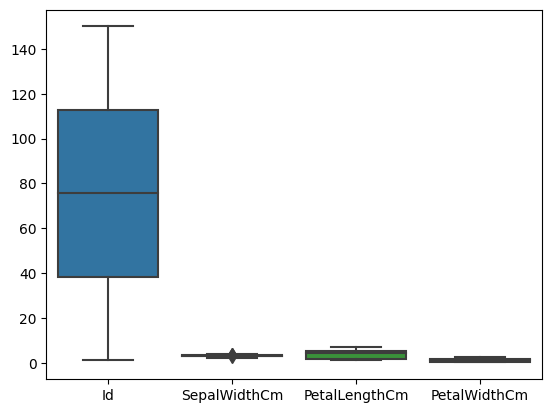

In [ ]:
sns.boxplot(a)
plt.show()

#TEST TRAIN SPLIT

In [20]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
class_names = iris.target_names
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=class_names))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
feature_importances = classifier.feature_importances_
for feature, importance in zip(iris.feature_names, feature_importances):
    print("{}: {:.4f}".format(feature, importance))

sepal length (cm): 0.1081
sepal width (cm): 0.0304
petal length (cm): 0.4400
petal width (cm): 0.4215


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
best_classifier.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


RandomForestClassifier(n_estimators=150, random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

Cross-Validation Scores: [0.95833333 0.95833333 0.875      1.         0.95833333]
Mean Accuracy: 95.00%


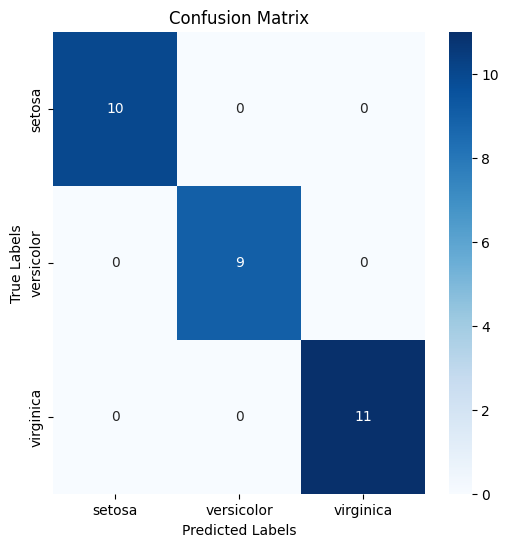

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
